# **Predicción de homicidios por municipio**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Librerias para generación y visualización del dataset**

In [2]:
# Importando librerias necesarias para la creación del dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Accede a Google Drive para importar los datos, los cuales provienen de una recopilación de bases de datos de indices de criminalidad en el triangulo norte
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Recopilación de datos**
Los datos han sido extraidos de un archivo CSV recuperados de una [recopilación de Bases de Datos sobre indicadores de criminalidad y justicia en el triángulo norte](https://www.aas.jjay.cuny.edu/single-post/base-de-datos?fbclid=IwAR3Itx49fRZJoazPUPWYLpASA3bag7UjRUCzey4pvtec5O9mjdwG9QLboUE), a la cual se puede acceder en el enlace.

**Referencia**: Academy for Security Analysis, John Jay College of Criminal Justice. (2020). *Recopilación de Bases de Datos sobre indicadores de criminalidad y justicia en El Salvador, Guatemala y Honduras*.

Por ser información pública también ha sido anexado para facilitar su consulta.

In [3]:
#Importando datos de CSV
#Referencia: Academy for Security Analysis, John Jay College of Criminal Justice. (2020). Recopilación de Bases de Datos sobre indicadores de criminalidad y justicia en El Salvador, Guatemala y Honduras.
df = pd.read_csv("drive/My Drive/IMLHom.csv")
print(len(df))
df.head()

44208


,NoTotal,Año,N,Mes,Fecha,Fecha_Completa,Dia,Hora,Rango_Horario,Sexo,Edad,Rango_Edad,Municipio,Departamento,Clasificacion_Arma,Tipo_Arma,Codigo_Departamento,Codigo_Municipio
0,1,2008,1,1,02/01,1/2/2008,Miercoles,1250,4,M,33,4,TACUBA,AHUACHAPAN,4,ASF X ESTRANGULACION,1,111
1,2,2008,2,1,02/01,1/2/2008,Miercoles,1900,5,M,43,5,CHALCHUAPA,SANTA ANA,5,OBJETO CONTUNDENTE,2,203
2,3,2008,3,1,02/01,1/2/2008,Miercoles,420,2,M,40,4,SANTA ANA,SANTA ANA,5,OBJETO CONTUNDENTE,2,210
3,4,2008,4,1,02/01,1/2/2008,Miercoles,550,2,M,24,3,CHALCHUAPA,SANTA ANA,2,BLANCA SIN ESPEC.,2,203
4,5,2008,5,1,02/01,1/2/2008,Miercoles,600,2,M,36,4,YUCUAIQUIN,LA UNION,2,CORTOCONTUNDENTE,14,1418


In [4]:
#Se importan tambien los nombres de los municipios y departamentos del Geoportal del CNR
df_geo = pd.read_csv("drive/My Drive/AllMunWithDept.csv")
print(len(df_geo))
df_geo.head()

262


,nom_mun,nom_dpto
0,ACAJUTLA,SONSONATE
1,AGUA CALIENTE,CHALATENANGO
2,AGUILARES,SAN SALVADOR
3,AHUACHAPAN,AHUACHAPAN
4,ALEGRIA,USULUTAN


## **2. Limpieza de datos**
Se procede a eliminar las columnas de dataset que son innecesarias para el modelo, así como a modificar los tipos de datos del mismo.
También se calcula el total de homicidios por año en cada municipio y se agrega esa nueva columna al dataset y finalmente se categorizan los nombres de los municipios.

### 2.1 Municipios y Departamentos del geoportal

In [5]:
#Dado que hay municipios que se llaman igual y pertenecen a diferente departamento 
#Se crea una nueva columna con la concatenacion del departamento y municipio para darle caracter unico
dept_mun_geo = []
for depto, mun in zip(df_geo['nom_dpto'], df_geo['nom_mun']):
  concat_str = depto+','+mun
  dept_mun_geo.append(concat_str)

In [6]:
#Agrega la columna de tiempo
dept_mun_series = pd.Series(dept_mun_geo)
df_geo['nom_dpto_nom_mun'] = dept_mun_series.values
df_geo.head()

,nom_mun,nom_dpto,nom_dpto_nom_mun
0,ACAJUTLA,SONSONATE,"SONSONATE,ACAJUTLA"
1,AGUA CALIENTE,CHALATENANGO,"CHALATENANGO,AGUA CALIENTE"
2,AGUILARES,SAN SALVADOR,"SAN SALVADOR,AGUILARES"
3,AHUACHAPAN,AHUACHAPAN,"AHUACHAPAN,AHUACHAPAN"
4,ALEGRIA,USULUTAN,"USULUTAN,ALEGRIA"


In [7]:
#Se crea un array con loss valores unicoss que se añadieron a la tabla
dept_mun_array = list(df_geo.nom_dpto_nom_mun.unique())
print(dept_mun_array)

['SONSONATE,ACAJUTLA', 'CHALATENANGO,AGUA CALIENTE', 'SAN SALVADOR,AGUILARES', 'AHUACHAPAN,AHUACHAPAN', 'USULUTAN,ALEGRIA', 'LA UNION,ANAMOROS', 'LA LIBERTAD,ANTIGUO CUSCATLAN', 'AHUACHAPAN,APANECA', 'SAN VICENTE,APASTEPEQUE', 'SAN SALVADOR,APOPA', 'MORAZAN,ARAMBALA', 'CHALATENANGO,ARCATAO', 'SONSONATE,ARMENIA', 'AHUACHAPAN,ATIQUIZAYA', 'SAN SALVADOR,AYUTUXTEPEQUE', 'CHALATENANGO,AZACUALPA', 'USULUTAN,BERLIN', 'LA UNION,BOLIVAR', 'MORAZAN,CACAOPERA', 'USULUTAN,CALIFORNIA', 'SONSONATE,CALUCO', 'CHALATENANGO,CANCASQUE', 'CUSCATLAN,CANDELARIA', 'SANTA ANA,CANDELARIA DE LA FRONTERA', 'SAN MIGUEL,CAROLINA', 'CHALATENANGO,CHALATENANGO', 'SANTA ANA,CHALCHUAPA', 'SAN MIGUEL,CHAPELTIQUE', 'MORAZAN,CHILANGA', 'LA LIBERTAD,CHILTIUPAN', 'SAN MIGUEL,CHINAMECA', 'SAN MIGUEL,CHIRILAGUA', 'CABANAS,CINQUERA', 'CHALATENANGO,CITALA', 'LA LIBERTAD,CIUDAD ARCE', 'SAN MIGUEL,CIUDAD BARRIOS', 'SANTA ANA,COATEPEQUE', 'CUSCATLAN,COJUTEPEQUE', 'LA LIBERTAD,COLON', 'SAN MIGUEL,COMACARAN', 'CHALATENANGO,COMALAPA'

In [8]:
#Se crea un diccionario que tendra el codigo del la categoria como clave y la concatenacion de depto y mun como valor
encode_dict = {}
for i in range(0, 262):
  encode_dict[i] = dept_mun_array[i]
print(encode_dict)

{0: 'SONSONATE,ACAJUTLA', 1: 'CHALATENANGO,AGUA CALIENTE', 2: 'SAN SALVADOR,AGUILARES', 3: 'AHUACHAPAN,AHUACHAPAN', 4: 'USULUTAN,ALEGRIA', 5: 'LA UNION,ANAMOROS', 6: 'LA LIBERTAD,ANTIGUO CUSCATLAN', 7: 'AHUACHAPAN,APANECA', 8: 'SAN VICENTE,APASTEPEQUE', 9: 'SAN SALVADOR,APOPA', 10: 'MORAZAN,ARAMBALA', 11: 'CHALATENANGO,ARCATAO', 12: 'SONSONATE,ARMENIA', 13: 'AHUACHAPAN,ATIQUIZAYA', 14: 'SAN SALVADOR,AYUTUXTEPEQUE', 15: 'CHALATENANGO,AZACUALPA', 16: 'USULUTAN,BERLIN', 17: 'LA UNION,BOLIVAR', 18: 'MORAZAN,CACAOPERA', 19: 'USULUTAN,CALIFORNIA', 20: 'SONSONATE,CALUCO', 21: 'CHALATENANGO,CANCASQUE', 22: 'CUSCATLAN,CANDELARIA', 23: 'SANTA ANA,CANDELARIA DE LA FRONTERA', 24: 'SAN MIGUEL,CAROLINA', 25: 'CHALATENANGO,CHALATENANGO', 26: 'SANTA ANA,CHALCHUAPA', 27: 'SAN MIGUEL,CHAPELTIQUE', 28: 'MORAZAN,CHILANGA', 29: 'LA LIBERTAD,CHILTIUPAN', 30: 'SAN MIGUEL,CHINAMECA', 31: 'SAN MIGUEL,CHIRILAGUA', 32: 'CABANAS,CINQUERA', 33: 'CHALATENANGO,CITALA', 34: 'LA LIBERTAD,CIUDAD ARCE', 35: 'SAN MIGUEL,

### 2.2 Dataset de homicidios

In [9]:
#Modifica el df a solo homicidios con los 4 tipos de armas que tenian más registros: ARMA DE FUEGO o ASF X ESTRANGULACION o OBJETO CONTUNDENTE o CORTOCONTUNDENTE
df = df[df.Tipo_Arma.str.contains('ARMA DE FUEGO|ASF X ESTRANGULACION|OBJETO CONTUNDENTE|CORTOCONTUNDENTE', regex=True)]
print(len(df))

40483


In [10]:
#Se eliminan las columnas innecesarias
df = df.drop(['NoTotal', 'N', 'Mes', 'Fecha', 'Fecha_Completa', 'Dia','Hora', 'Rango_Horario', 'Codigo_Departamento', 'Codigo_Municipio', 'Rango_Edad', 'Clasificacion_Arma', 'Edad', 'Sexo', 'Tipo_Arma'], axis=1)
df.head()

,Año,Municipio,Departamento
0,2008,TACUBA,AHUACHAPAN
1,2008,CHALCHUAPA,SANTA ANA
2,2008,SANTA ANA,SANTA ANA
4,2008,YUCUAIQUIN,LA UNION
5,2008,TONACATEPEQUE,SAN SALVADOR


In [11]:
# Correcciones en nombres de departamentos y/o municipios para que esten acorde al geoJSON
df.loc[df.Departamento == 'CABAÑAS', 'Departamento'] = 'CABANAS'
df.loc[df.Municipio == 'CIUDAD DELGADO', 'Municipio'] = 'DELGADO'
df.loc[df.Municipio == 'SAN JOSE CANCASQUE', 'Municipio'] = 'CANCASQUE'
df.loc[df.Municipio == 'MERCEDES  LA CEIBA', 'Municipio'] = 'MERCEDES LA CEIBA'
df.loc[df.Municipio == 'MERCEDES LA CEIBA', 'Departamento'] = 'LA PAZ'
df.loc[df.Municipio == 'MERCEDES UMAÑA', 'Municipio'] = 'MERCEDES UMANA'
df.loc[df.Municipio == 'NAHUILINGO', 'Municipio'] = 'NAHULINGO'
df.loc[df.Municipio == 'NAHUILINGO', 'Municipio'] = 'NAHULINGO'
df.loc[df.Municipio == 'NUEVA EDEN DE SAN JUAN', 'Municipio'] = 'NUEVO EDEN DE SAN JUAN'
df.loc[df.Municipio == 'OSCICALA', 'Municipio'] = 'OSICALA'
df.loc[df.Municipio == 'SAN BUENAVENTURA', 'Municipio'] = 'SAN BUENA VENTURA'
df.loc[df.Municipio == 'AHUACHAPAN', 'Departamento'] = 'AHUACHAPAN'
df.loc[df.Municipio == 'COMALAPA', 'Departamento'] = 'CHALATENANGO'

In [12]:
# Se concatena el nombre de departamento y municipio para el df de homicidios
dept_mun_df = []
for depto, mun in zip(df['Departamento'], df['Municipio']):
  df_concat = depto+','+mun
  dept_mun_df.append(df_concat)

In [13]:
#Agrega la columna concatenada
dm_df_series = pd.Series(dept_mun_df)
df['dept_mun_str'] = dm_df_series.values
df.head()

,Año,Municipio,Departamento,dept_mun_str
0,2008,TACUBA,AHUACHAPAN,"AHUACHAPAN,TACUBA"
1,2008,CHALCHUAPA,SANTA ANA,"SANTA ANA,CHALCHUAPA"
2,2008,SANTA ANA,SANTA ANA,"SANTA ANA,SANTA ANA"
4,2008,YUCUAIQUIN,LA UNION,"LA UNION,YUCUAIQUIN"
5,2008,TONACATEPEQUE,SAN SALVADOR,"SAN SALVADOR,TONACATEPEQUE"


In [14]:
#Se eliminan otras columnas innecesarias
df = df.drop(['Municipio', 'Departamento'], axis=1)
df.head()

,Año,dept_mun_str
0,2008,"AHUACHAPAN,TACUBA"
1,2008,"SANTA ANA,CHALCHUAPA"
2,2008,"SANTA ANA,SANTA ANA"
4,2008,"LA UNION,YUCUAIQUIN"
5,2008,"SAN SALVADOR,TONACATEPEQUE"


In [15]:
#Creamos una copia de la columna año para hacer el count()
df["AñoAux"] = df["Año"]

In [16]:
#Guardamos el df agrupado para luego asignar los totales a cada fila del df original
df_g = df.groupby(['dept_mun_str', 'Año']).count()

In [17]:
#Creamos la columna de total y la asignamos al df
total_array = []
for deptmun, año in zip(df["dept_mun_str"], df["Año"]):
  total_array.append(df_g.loc[deptmun,año].AñoAux)

total_values = pd.Series(total_array)
df['Total'] = total_values.values
df.head()

,Año,dept_mun_str,AñoAux,Total
0,2008,"AHUACHAPAN,TACUBA",2008,10
1,2008,"SANTA ANA,CHALCHUAPA",2008,57
2,2008,"SANTA ANA,SANTA ANA",2008,176
4,2008,"LA UNION,YUCUAIQUIN",2008,1
5,2008,"SAN SALVADOR,TONACATEPEQUE",2008,49


In [18]:
#Elimina la columna auxiliar
df.drop(['AñoAux'], axis = 1, inplace=True)
df.head()

,Año,dept_mun_str,Total
0,2008,"AHUACHAPAN,TACUBA",10
1,2008,"SANTA ANA,CHALCHUAPA",57
2,2008,"SANTA ANA,SANTA ANA",176
4,2008,"LA UNION,YUCUAIQUIN",1
5,2008,"SAN SALVADOR,TONACATEPEQUE",49


In [19]:
# Se agrega el codigo de depto_mun para categorizar el municipio
encodes_array = []
for dm in df["dept_mun_str"]:
  i = dept_mun_array.index(dm)
  encodes_array.append(i)

In [20]:
# Se agrega la columna de valores de categorias al df
encoded_series = pd.Series(encodes_array)
df['Municipio_encode'] = encoded_series.values
df.head()

,Año,dept_mun_str,Total,Municipio_encode
0,2008,"AHUACHAPAN,TACUBA",10,236
1,2008,"SANTA ANA,CHALCHUAPA",57,26
2,2008,"SANTA ANA,SANTA ANA",176,208
4,2008,"LA UNION,YUCUAIQUIN",1,259
5,2008,"SAN SALVADOR,TONACATEPEQUE",49,249


In [21]:
#Eliminamos la columna dept_mun_str para el df final y convertimos los tipos de datos
final_df = df.drop(['dept_mun_str'], axis = 1, inplace=False)
final_df = final_df.convert_dtypes()
final_df.head()

,Año,Total,Municipio_encode
0,2008,10,236
1,2008,57,26
2,2008,176,208
4,2008,1,259
5,2008,49,249


## **3. Gráfico de totales por año.**
Se grafica la nube de puntos que tenemos en el dataset, donde se puede percibir que hay una gran variabilidad entre los datos, y que probablemente no sigan ningún tipo de tendencia.

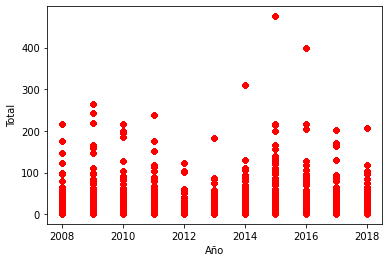

In [22]:
# Graficamos el total de homicidios por año para evaluar la 'tendencia'
final_df.plot(x ='Año', y='Total', kind = 'scatter', color ="red")
plt.show()

## **4. Modelo de predicción de cantidad de homicidos**
El objetivo del modelo es determinar si a través de un año y municipio es posible encontrar un patrón o relación histórica con las cantidad (total) de homicidios en el mismo.

In [23]:
#Definimos las variables x e y, dado un año y municipio se busca predecir cuandos homicidios habran
x = final_df[['Año', 'Municipio_encode']]
y = final_df[['Total']]

In [24]:
#Separamos el data set en 80% train y 20% test
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### **Epsilon-Support Vector Regression con kernel Radial basis function (rbf)**

In [25]:
#Aplicamos el algoritmo de Epsilon-Support Vector Regression
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x_train,y_train.values.ravel())

y_pred_rbf = svr_rbf.predict(x_test)

Se obtiene un coeficiente de correlación ($R^2$) de 92.43% al entrenar el modelo y de un 91.99% al predecir los valores de $y$ comparado con los valores reales del dataset.

In [26]:
#Obtenemos el coeficiente de determinacion para evaluar cuanto se ajusta el modelo
from sklearn.metrics import r2_score

r2_score_train = svr_rbf.score(x_train,y_train)
print('R^2 train: '+str(r2_score_train))

r2_score_test = r2_score(y_test,y_pred_rbf)
print('R^2 test: '+str(r2_score_test))

R^2 train: 0.9242704128518364
R^2 test: 0.9198923297110021


### **Guardar el modelo**

In [27]:
#Se guarda el modelo
import joblib

filename_model = 'modelo_rbf.pkl'
joblib.dump(svr_rbf, filename_model)

['modelo_rbf.pkl']

In [28]:
#Se guarda el diccionario que contiene el codigo de categoria como key y como value la concatenacion del departamento y municipio
filename_dict = 'encode_mun.pkl'
joblib.dump(encode_dict, filename_dict)

['encode_mun.pkl']

In [29]:
#Se carga el modelo guardado para verificar su correcto funcionamiento
loaded_model = joblib.load(filename_model)
y_load = loaded_model.predict(x_test)

print(r2_score(y_test, y_load))

0.9198923297110021


In [30]:
#Se carga el diccionario guardado
loaded_dict = joblib.load(filename_dict)

print(loaded_dict)

{0: 'SONSONATE,ACAJUTLA', 1: 'CHALATENANGO,AGUA CALIENTE', 2: 'SAN SALVADOR,AGUILARES', 3: 'AHUACHAPAN,AHUACHAPAN', 4: 'USULUTAN,ALEGRIA', 5: 'LA UNION,ANAMOROS', 6: 'LA LIBERTAD,ANTIGUO CUSCATLAN', 7: 'AHUACHAPAN,APANECA', 8: 'SAN VICENTE,APASTEPEQUE', 9: 'SAN SALVADOR,APOPA', 10: 'MORAZAN,ARAMBALA', 11: 'CHALATENANGO,ARCATAO', 12: 'SONSONATE,ARMENIA', 13: 'AHUACHAPAN,ATIQUIZAYA', 14: 'SAN SALVADOR,AYUTUXTEPEQUE', 15: 'CHALATENANGO,AZACUALPA', 16: 'USULUTAN,BERLIN', 17: 'LA UNION,BOLIVAR', 18: 'MORAZAN,CACAOPERA', 19: 'USULUTAN,CALIFORNIA', 20: 'SONSONATE,CALUCO', 21: 'CHALATENANGO,CANCASQUE', 22: 'CUSCATLAN,CANDELARIA', 23: 'SANTA ANA,CANDELARIA DE LA FRONTERA', 24: 'SAN MIGUEL,CAROLINA', 25: 'CHALATENANGO,CHALATENANGO', 26: 'SANTA ANA,CHALCHUAPA', 27: 'SAN MIGUEL,CHAPELTIQUE', 28: 'MORAZAN,CHILANGA', 29: 'LA LIBERTAD,CHILTIUPAN', 30: 'SAN MIGUEL,CHINAMECA', 31: 'SAN MIGUEL,CHIRILAGUA', 32: 'CABANAS,CINQUERA', 33: 'CHALATENANGO,CITALA', 34: 'LA LIBERTAD,CIUDAD ARCE', 35: 'SAN MIGUEL,